In [2]:
import pandas as pd #linear algebra
import numpy as np #data processing ,csv file I/o 


In [13]:
df=pd.read_csv("C:/AI/churn_Modelling.csv")

In [14]:
df.shape

(10000, 14)

In [16]:
#Total 10 thousand data points and 14 columns


In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
#RowNUmber CustomerId and surname are not useful ,hence dropped

In [20]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.isnull() #there are no null values

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [26]:
#gender and geography are object type we need to convert it into numerical form

In [27]:
df.duplicated().sum()

0

In [29]:
#lets check how many customers have left the bank
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [31]:
#let us check how many customers are from whuch geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# less customer from spain and germany and more from france

In [32]:
#Let us check how many males and how many female
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [34]:
#we want to convert geography and gender which is an object type convert into
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [35]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [36]:
#hear geography franceis dropped and male column is dropped

In [46]:
#assign all the features to x and target column as y
#divide the data into train and test
x=df.drop(columns=['Exited'])
y=df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [48]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [49]:
X_train.shape   #there are 11 features 

(8000, 11)

In [52]:
#let us make make uniform scaling of all features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [53]:
#let us define ANN model

In [56]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [57]:
model=Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation ='sigmoid'))

C:\Users\ishwa\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
#11 features 11*3 (3 input links) = 33+biased = 33+3 = 36+output layer =36 +3 = 39+bias = 40 parameter

In [ ]:
#let us compile the model ,loss we will take binary cross entropy and for 

In [60]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [61]:
#let us train the model
history= model.fit(X_train_trf,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0908
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8115
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6576
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5752
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5328
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4991 
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4748
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4559
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4629
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4571


In [62]:
#now let us check final weights after training

In [63]:
model.layers[0].get_weights()

[array([[ 0.01288121,  0.01465634, -0.52226067],
        [-2.0147996 ,  1.4910684 ,  0.47329628],
        [ 0.01595657, -0.06099847, -0.02720005],
        [-0.18952435,  0.14051768, -0.10757847],
        [ 0.2519781 , -0.08729717, -0.92901546],
        [-0.05456849, -0.29123592,  0.21868992],
        [ 0.4510425 , -0.6577923 , -0.23097652],
        [-0.04359268, -0.02487844, -0.14446607],
        [-0.57437617,  0.84454465,  0.7657453 ],
        [ 0.11261232, -0.12577291,  0.41718927],
        [ 0.29708397, -0.6108517 , -0.71507925]], dtype=float32),
 array([ 0.6689965 , -0.65805334, -0.69744015], dtype=float32)]

In [64]:
model.layers[1].get_weights()

[array([[-1.0242149 ],
        [ 0.49428388],
        [ 0.29864925]], dtype=float32),
 array([-1.0432396], dtype=float32)]

In [65]:
y_log=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [67]:
y_log  #the result produced is in the form of probablity

array([[0.26704174],
       [0.2889129 ],
       [0.21276084],
       ...,
       [0.15086569],
       [0.19259344],
       [0.21251272]], dtype=float32)

In [68]:
#the uotput is in terms of probabality since you are using sigmoid activation function
#if the output is less then 0.5 then output 0 means customer will leave the bank
#if output is grater then 0.5 and  means customer will retain the bank

In [69]:
y_pred=np.where(y_log>0.5,1,0)

In [70]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [76]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation ='relu',input_dim=11))

model.add(Dense(1,activation ='sigmoid'))



C:\Users\ishwa\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
#11*11 + 11 bias , 11*11+11 bias , 11*1 bias = 276


In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
history= model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7660 - loss: 0.5777 - val_accuracy: 0.7969 - val_loss: 0.4895
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.4662 - val_accuracy: 0.8056 - val_loss: 0.4467
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8153 - loss: 0.4280 - val_accuracy: 0.8125 - val_loss: 0.4317
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8191 - loss: 0.4193 - val_accuracy: 0.8181 - val_loss: 0.4199
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8305 - loss: 0.4030 - val_accuracy: 0.8244 - val_loss: 0.4066
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8349 - loss: 0.3945 - val_accuracy: 0.8313 - val_loss: 0.3944
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.3774 - val_accuracy: 0.8331 - val_loss: 0.3855
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8496 - loss: 0.3687 - val_accu

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8682 - loss: 0.3191 - val_accuracy: 0.8594 - val_loss: 0.3545
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.3184 - val_accuracy: 0.8594 - val_loss: 0.3551
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3297 - val_accuracy: 0.8569 - val_loss: 0.3547
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8730 - loss: 0.3144 - val_accuracy: 0.8612 - val_loss: 0.3549
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.3146 - val_accuracy: 0.8581 - val_loss: 0.3558
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3207 - val_accuracy: 0.8575 - val_loss: 0.3548
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3195 - val_accuracy: 0.8531 - val_loss: 0.3565
Epoch 58/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 0.3153 - val_accuracy:

In [81]:
model.layers[0].get_weights()

[array([[ 0.01856303, -0.24280646,  0.04952288, -0.04027382,  0.06412882,
          0.24944496, -0.16488414, -0.10847691,  0.7392075 ,  0.03518375,
         -0.12490498],
        [-0.09064118,  0.41221407, -0.07685346, -0.11831877,  0.12212181,
          0.47268066,  1.4330751 , -0.6004905 ,  0.44461644, -0.48430434,
          0.18983553],
        [ 0.21401517, -0.06607245,  0.01292465,  0.06698996, -0.00869774,
          0.31057328, -0.02539979, -0.31090862,  0.4453464 , -0.05242642,
         -0.17910415],
        [-1.072227  ,  0.15739188, -0.03517118, -0.37899438, -0.17632458,
          0.0976092 , -0.29629022, -0.07533531, -0.47112542,  0.04661259,
         -0.3007391 ],
        [-0.25022236, -0.08783322, -1.1689911 , -0.14836173,  1.2729121 ,
          0.4567848 , -0.37425384,  0.05261408, -0.3613163 , -0.06067322,
         -0.8878977 ],
        [ 0.03054351,  0.38313544, -0.04411781, -0.2921891 , -0.10274062,
         -0.5284806 , -0.2664362 , -0.5483561 , -0.17468707,  0.9455478

In [82]:
model.layers[1].get_weights()

[array([[ 0.00300836,  0.18402785, -0.8672241 ,  0.34994864,  0.2474356 ,
          0.6143953 ,  0.02812646, -0.73518485, -0.2707635 ,  0.24864481,
          0.30221012],
        [-0.3160131 , -0.42528862,  0.22344288,  0.32603005,  0.32350594,
         -0.0692677 , -0.11351272,  0.6349567 ,  0.38957933,  0.25237054,
         -0.163935  ],
        [-0.18158199,  0.4029679 , -0.03263584, -0.0351866 , -0.7249068 ,
         -0.17319572,  0.29618567,  0.17968553, -0.41340664, -0.06648079,
         -0.01776611],
        [ 0.6195108 , -0.17571612, -0.2958133 , -0.32157433,  0.49167573,
          0.21936893,  0.35969746, -0.57757205,  0.23870714, -0.11983336,
         -0.18132076],
        [-0.19324413,  0.3021692 ,  0.21485206, -0.09764568,  0.23348005,
         -0.6951188 , -0.26755935,  1.1528401 , -0.09083357, -0.34159112,
         -0.02147178],
        [ 0.24278861,  0.57806015,  0.13183084, -0.00718975, -0.02148151,
         -0.28237492,  0.262119  ,  0.33759058, -0.26628247,  0.0703062

In [83]:
y_log=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [84]:
y_pred=np.where(y_log>0.5,1,0)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)   #now accuracy has improved then earlier

0.8565

In [86]:
history.history 

{'accuracy': [0.7873437404632568,
  0.8006250262260437,
  0.8157812356948853,
  0.8253124952316284,
  0.835156261920929,
  0.8435937762260437,
  0.8509374856948853,
  0.8518750071525574,
  0.8537499904632568,
  0.8542187213897705,
  0.8560937643051147,
  0.8579687476158142,
  0.8581249713897705,
  0.8595312237739563,
  0.8614062666893005,
  0.8618749976158142,
  0.8607812523841858,
  0.8598437309265137,
  0.8621875047683716,
  0.862500011920929,
  0.8635937571525574,
  0.8628125190734863,
  0.8639062643051147,
  0.862500011920929,
  0.8635937571525574,
  0.864062488079071,
  0.8651562333106995,
  0.864062488079071,
  0.8631250262260437,
  0.8629687428474426,
  0.8656250238418579,
  0.8634374737739563,
  0.8635937571525574,
  0.8623437285423279,
  0.8650000095367432,
  0.8645312786102295,
  0.8645312786102295,
  0.8642187714576721,
  0.8645312786102295,
  0.8659374713897705,
  0.8659374713897705,
  0.8650000095367432,
  0.8651562333106995,
  0.8668749928474426,
  0.8662499785423279,
  0

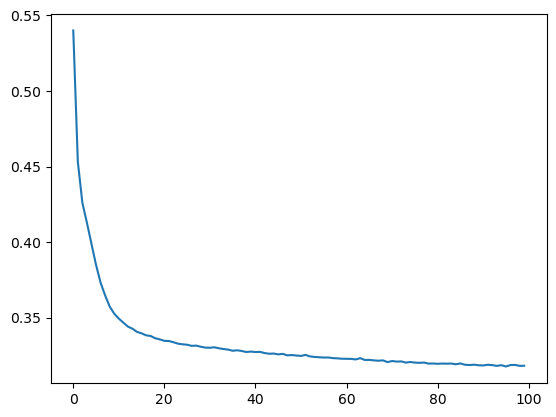

In [88]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

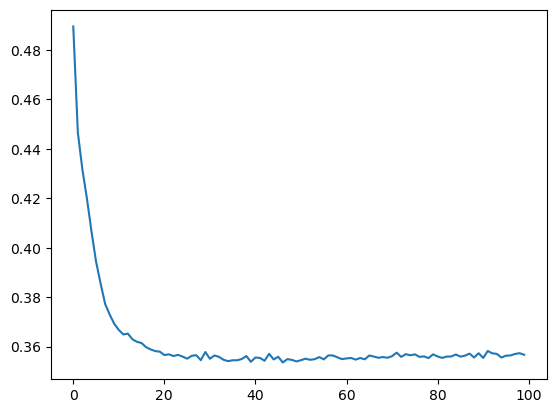

In [89]:
plt.plot(history.history['val_loss'])

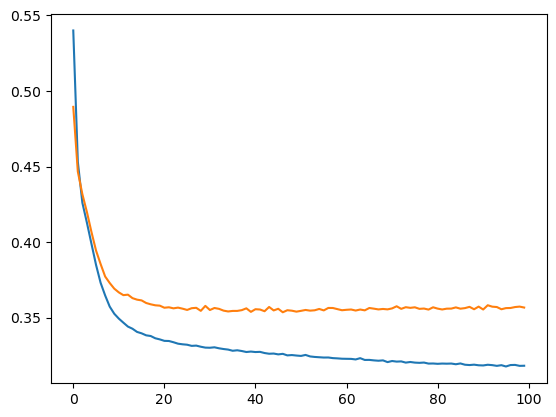

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])